### SVM II

In [1182]:
from numpy import *
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Circle


In [1183]:
dataMat = np.array([[4,2.9],[4,4],[1,2.5],[2.5,1],[4.9,4.5],[1.9,1.9],[3.5,4],[0.5,1.5],[2,2.1],[4.5,2.5]])
labelMat = np.array([[1],[1],[-1],[-1],[1],[-1],[1],[-1],[-1],[1]])

In [1187]:
def selectJrand(i, n):  
    j = i  
    while (j==i): 
        j = int(random.uniform(0, n)) 
    return j

def clipAlpha(aj, H, L):  
    if aj > H:   
        aj = H  
    if L > aj:   
        aj = L  
        
    return aj

def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    dataMatrix = mat(dataMatIn); labelMat = mat(classLabels)
    b = 0; 
    m,n = shape(dataMatrix)
    alphas = mat(zeros((m,1)))
    iter = 0
    #iterations
    while (iter < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            #cal g(xi)
            gXi = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b
            #cal Ei
            Ei = gXi - float(labelMat[i])
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                #random select one alpha
                j = selectJrand(i,m)
                #cal g(xj)
                gXj = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                #cal Ej
                Ej = gXj - float(labelMat[j])
                #pass the original alpha to old
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy();
                #cal min and max
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: print("L==H"); continue
                #cal eta
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0: print("eta>=0"); continue
                #cal alpha[j]
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                alphas[j] = clipAlpha(alphas[j],H,L)
                if (abs(alphas[j] - alphaJold) < 0.00001): print("j not moving enough"); continue
                #cal alpha[i] 
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])
                #cal b1
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                #cal b2
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                #cal b
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                alphaPairsChanged += 1
                print("iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged))
        if (alphaPairsChanged == 0): iter += 1
        else: iter = 0
    print("iteration number: %d" % iter)
    return b,alphas

def calcWs(alphas,dataArr,classLabels):
    X = mat(dataArr); labelMat = mat(classLabels)
    m,n = shape(X)
    #初始化w都为1
    w = zeros((n,1))
    #循环计算
    for i in range(m):
        w += multiply(alphas[i]*labelMat[i],X[i,:].T)
    return w

In [1189]:
b, alphas = smoSimple(dataMat, labelMat, 0.6, 0.001, 40) 
w = calcWs(alphas, dataMat, labelMat) 
print("b=", b) 
print("alphas=", alphas) 
print("w=", w)

iter: 0 i:0, pairs changed 1
j not moving enough
j not moving enough
L==H
iter: 0 i:6, pairs changed 1
j not moving enough
j not moving enough
j not moving enough
iter: 1 i:0, pairs changed 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iter: 3 i:3, pairs changed 1
iter: 3 i:6, pairs changed 2
iteration number: 40
b= [[-3.4998986]]
alphas= [[0.42122473]
 [0.        ]
 [0.        ]
 [0.02512664]
 [0.        ]
 [0.        ]
 [0.01064753]
 [0.        ]
 [0.40674562]
 [0.        ]]
w= [[0.84585743]
 [0.38484939]]


#### a)

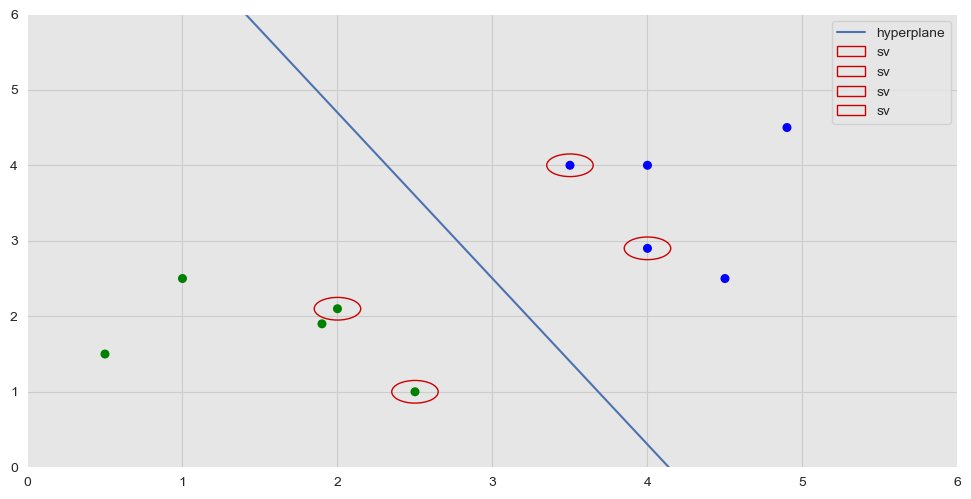

In [1193]:
# 画点 
fig = plt.figure()
ax = fig.add_subplot(111)
cm_dark = mpl.colors.ListedColormap(['g', 'b'])
ax.scatter(dataMat[:,0],dataMat[:,1],c=labelMat.squeeze(),cmap=cm_dark,s=30)

#画决策平面 
x = arange(0, 6, 0.1)
y = (-w[0]*x - b)/w[1] 
ax.plot(x, y.reshape(-1, 1),label = 'hyperplane')
ax.axis([0, 6, 0, 6]) 

# 画支持向量 
alphas_non_zeros_index = where(alphas>0) 
for i in alphas_non_zeros_index[0]:  
    circle = Circle((dataMat[i][0], dataMat[i][1]), 0.15, facecolor='none', edgecolor=(0.8, 0, 0), linewidth=1,label = 'sv') 
    ax.add_patch(circle) 
ax.legend(loc='upper right')    
plt.show()

#### b)

In [1194]:
#x6 =([1.9,1.9])
dist = np.abs((-w[0]*1.9 - b)/w[1] - 1.9)/np.power((-w[0]/w[1])**2+1 ,0.5)
print("the distance of x6 from the hyperplane = ", dist)
#x1,x4,x7,x9 are sv
#x1 = ([1.9,1.9])
margin = np.abs((-w[0]*4 - b)/w[1] - 2.9)/np.power((-w[0]/w[1])**2+1 ,0.5)
print("the margin = ", margin)
if(dist <= margin):
    print("x6 within the margin")
else:
    print("x6 out of the margin")

the distance of x6 from the hyperplane =  [[1.24993594]]
the margin =  [[1.07565141]]
x6 out of the margin


#### c)

In [1195]:
#z = ([3,3])
z = (w[0]*3 + b)/w[1] + 3
if(z>0):
    print("y_z = 1")
else:
    print("y_z = -1")


y_z = 1


### Gaussian Process

In [1149]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

In [1150]:
n = 100
n_star = 100
x = np.linspace(start=0, stop=np.pi*2, num=n)
x_star = np.linspace(start=0, stop=np.pi*2, num=n_star)

def kernel_function(x, y, l):
    kernel = np.exp(- (x - y)**2 / (2 * l))
    return kernel

import itertools

def compute_cov_matrices(x, x_star, l):
    n = x.shape[0]
    n_star = x_star.shape[0]
    
    K = [kernel_function(i, j, l) for (i, j) in itertools.product(x, x)]
    K = np.array(K).reshape(n, n)    
    
    K_star2 = [kernel_function(i, j, l) for (i, j) in itertools.product(x_star, x_star)]
    K_star2 = np.array(K_star2).reshape(n_star, n_star)
    
    K_star = [kernel_function(i, j, l) for (i, j) in itertools.product(x,x_star)]
    K_star = np.array(K_star).reshape(n,n_star) 
    return K,K_star2,K_star



In [1151]:
K,K_star2,K_star = compute_cov_matrices(x, x_star, l=0.1)

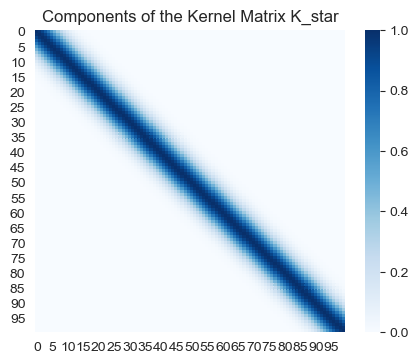

In [1152]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(data=K_star, cmap='Blues', ax=ax)
ax.set(title='Components of the Kernel Matrix K_star');

#### Draw some plots of curves sampled from just the prior distribution.

[Text(0.5, 1.0, 'Samples of Prior Distribution, l = 0.1')]

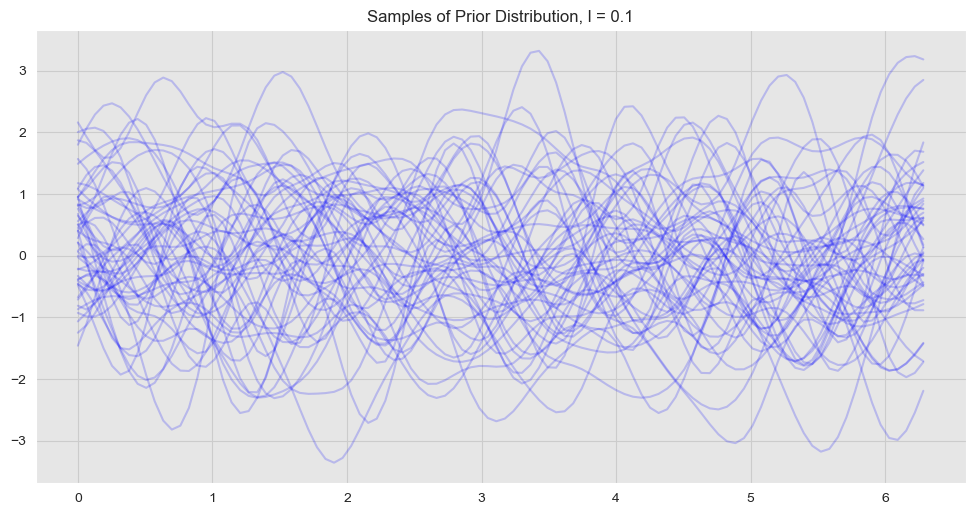

In [1153]:
fig, ax = plt.subplots()
for i in range(0, 50):
    # Sample from prior distribution. 
    z_star = np.random.multivariate_normal(mean=np.zeros(n_star), cov=K_star2)
    # Plot function.
    sns.lineplot(x=x, y=z_star, color='blue', alpha=0.2, ax=ax)
ax.set(title='Samples of Prior Distribution, l = 0.1')

#### Try a handful of different settings for λ to see what effect is has.

In [1154]:
K1,K_star21,K_star1 = compute_cov_matrices(x, x_star, l=0.5)

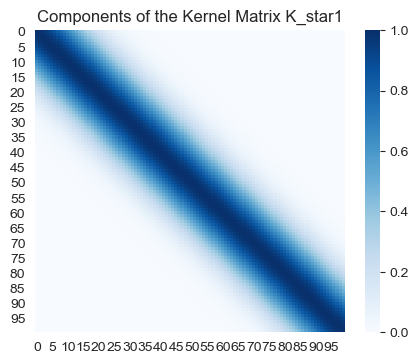

In [1155]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(data=K_star1, cmap='Blues', ax=ax)
ax.set(title='Components of the Kernel Matrix K_star1');

[Text(0.5, 1.0, 'Samples of Prior Distribution, l = 0.5')]

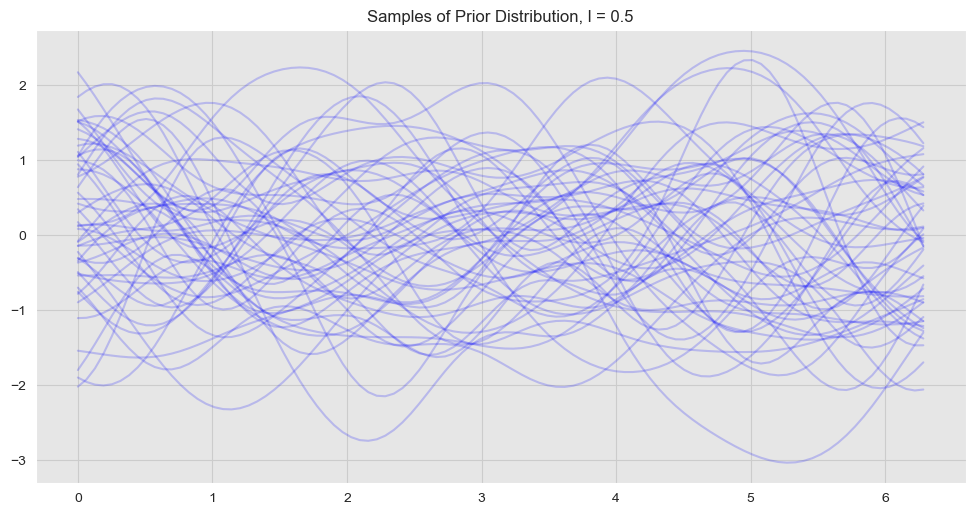

In [1157]:
fig, ax = plt.subplots()
for i in range(0, 50):
    # Sample from prior distribution. 
    z_star = np.random.multivariate_normal(mean=np.zeros(n_star), cov=K_star1)
    # Plot function.
    sns.lineplot(x=x, y=z_star, color='blue', alpha=0.2, ax=ax)
ax.set(title='Samples of Prior Distribution, l = 0.5')

#### add a small value to the diagonal of your covariance matrix to ensure it is invertible.

In [1158]:
sigma_n = 0.5
a = np.concatenate((K + (sigma_n**2)*np.eye(n), K_star), axis=0)
print(a.shape)
b = np.concatenate((K_star.T, K_star2), axis=0)
print(b.shape)
C = np.concatenate((a, b), axis=1)
print(C.shape)

(200, 100)
(200, 100)
(200, 200)


In [1159]:
C.shape == (n + n_star, n + n_star)

True

In [1160]:
np.linalg.inv(C)

array([[ 4.00000000e+00, -3.16910794e-15,  3.60588894e-15, ...,
         3.92590378e-03, -1.04485996e-03,  9.75998087e-05],
       [-9.01360644e-15,  4.00000000e+00,  7.73906237e-16, ...,
         8.53818879e-03, -2.77385101e-03,  1.38455680e-04],
       [ 1.35820982e-14, -3.99142500e-15,  4.00000000e+00, ...,
        -6.06232754e-02,  1.34065425e-02, -1.31184448e-03],
       ...,
       [ 2.82560040e-01, -9.15877361e-02,  8.50096350e-02, ...,
         4.83979675e+12, -9.15450809e+11,  8.37641274e+10],
       [-5.82289361e-02,  1.88468262e-02, -1.74282989e-02, ...,
        -1.00388388e+12,  1.93640893e+11, -1.80267525e+10],
       [ 5.59915668e-03, -1.81024397e-03,  1.66916586e-03, ...,
         9.82516102e+10, -1.92713164e+10,  1.82026706e+09]])

In [1161]:
np.all(C.T == C)

True

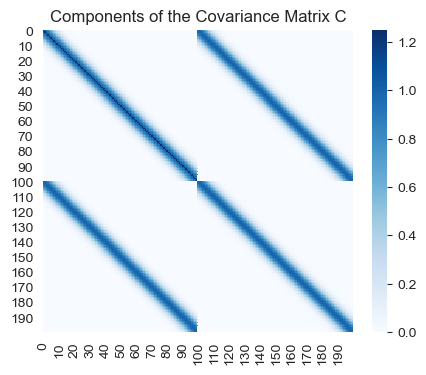

In [1162]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(data=C, cmap='Blues', ax=ax)
ax.set(title='Components of the Covariance Matrix C');

#### Test your Gaussian process regression with the following example.

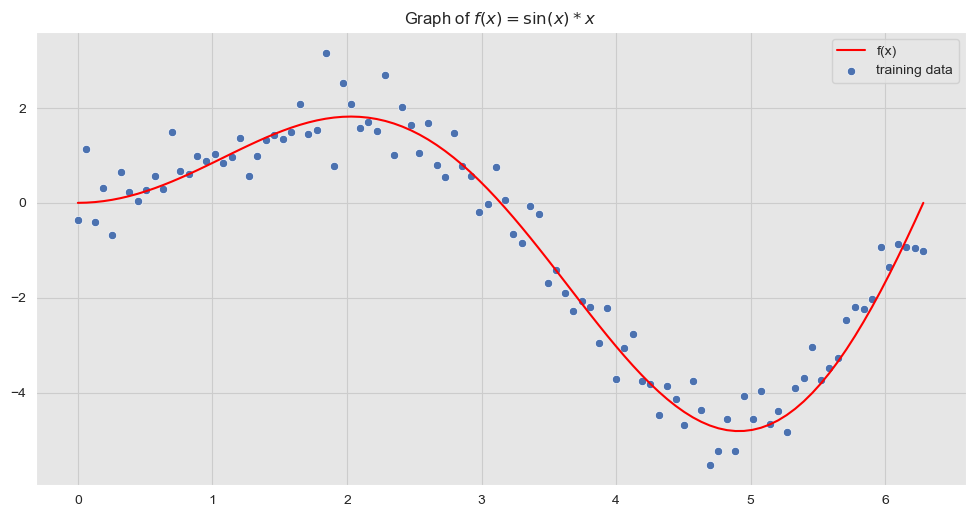

In [1163]:
# Define dimension.
d = 1
# Number of samples (training set). 
n = 100
x = np.linspace(start=0, stop=2*np.pi, num=n)
sigma_n = 0.5
epsilon = np.random.normal(loc=0, scale=sigma_n, size=n)

def f(x):
    f = np.sin(x)*x
    return(f)

f_x = f(x)
y = f_x + epsilon

fig, ax = plt.subplots()
# Plot function f. 
sns.lineplot(x=x, y=f_x, color='red', label = 'f(x)', ax=ax)
sns.scatterplot(x=x, y=y, label='training data', ax=ax);
ax.legend(loc='upper right')
ax.set_title(r'Graph of $f(x) = \sin(x) * x$');

In [1166]:
def compute_gpr_parameters(K, K_star2, K_star, sigma_n):
    """Compute gaussian regression parameters."""
    n = K.shape[0]
    # Mean.
    f_bar_star = np.dot(K_star, np.dot(np.linalg.inv(K + (sigma_n**2)*np.eye(n)), y.reshape([n, d])))
    # Covariance.
    cov_f_star = K_star2 - np.dot(K_star, np.dot(np.linalg.inv(K + (sigma_n**2)*np.eye(n)), K_star.T))
    
    return (f_bar_star, cov_f_star)

f_bar_star, cov_f_star = compute_gpr_parameters(K, K_star2, K_star, sigma_n)

#fig, ax = plt.subplots(figsize=(5, 4))
#sns.heatmap(data=cov_f_star, cmap='Blues', ax=ax)
#ax.set_title('Components of the Covariance Matrix cov_f_star')

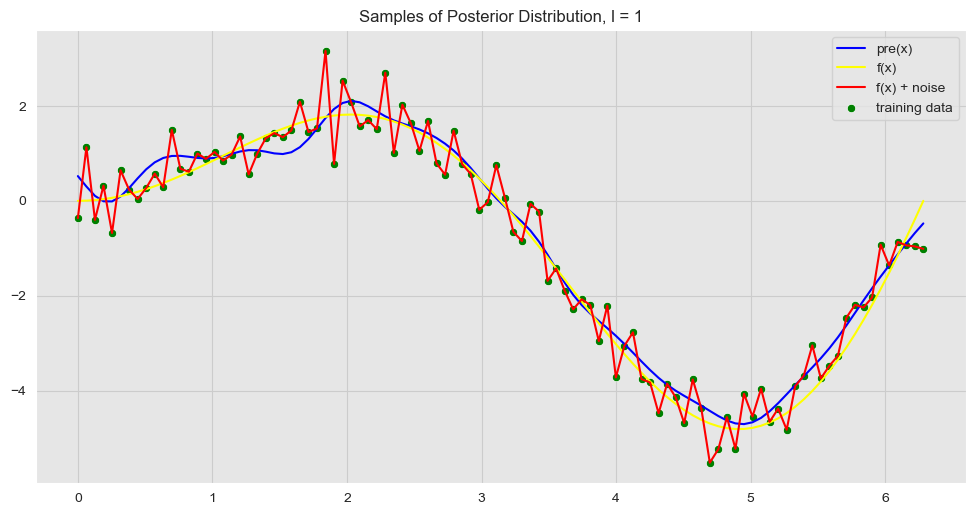

In [1167]:
fig, ax = plt.subplots()

for i in range(1):
    # Sample from posterior distribution. 
    z_star = np.random.multivariate_normal(mean=f_bar_star.squeeze(), cov=cov_f_star)
    # Plot function.
    sns.lineplot(x=x_star, y=z_star, color="blue", label = 'pre(x)',alpha=1, ax=ax);


# Plot "true" linear fit.
sns.lineplot(x=x, y=f_x, color='yellow', label = 'f(x)', ax=ax)
sns.lineplot(x=x, y=y, color='red', label = 'f(x) + noise', ax=ax)
sns.scatterplot(x=x, y=y, color='green',label='training data', ax=ax);
ax.set(title=f'Samples of Posterior Distribution, l = {1}')
ax.legend(loc='upper right')


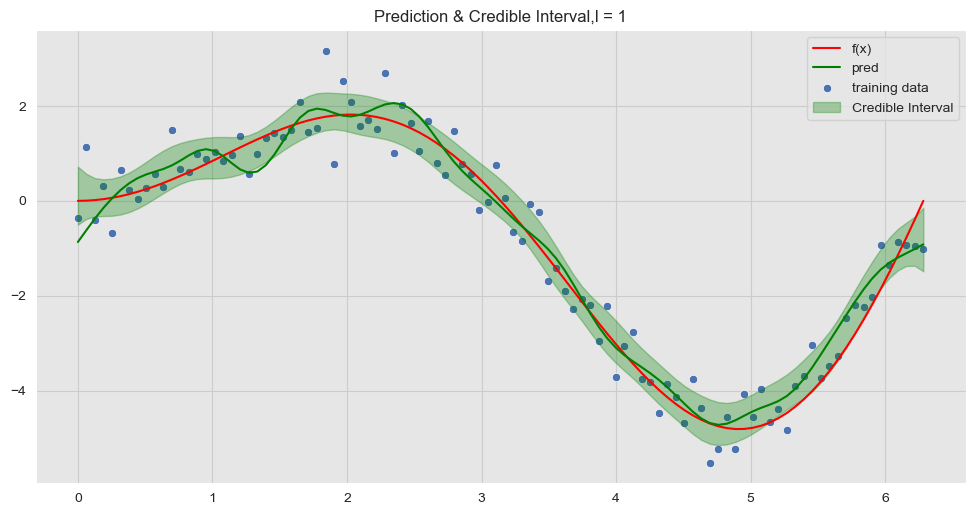

In [1169]:
# Generate samples from posterior distribution. 
y_pred = np.random.multivariate_normal(mean=f_bar_star.squeeze(), cov=cov_f_star,)
y_hat_samples = np.random.multivariate_normal(mean=f_bar_star.squeeze(), cov=cov_f_star, size=100)
# Compute the mean of the sample. 
y_hat = np.apply_over_axes(func=np.mean, a=y_hat_samples, axes=0).squeeze()
# Compute the standard deviation of the sample. 
y_hat_sd = np.apply_over_axes(func=np.std, a=y_hat_samples, axes=0).squeeze()

fig, ax = plt.subplots()
# Plot training data.
sns.scatterplot(x=x, y=y, label='training data', ax=ax)
# Plot corridor. 
ax.fill_between(
    x=x_star, 
    y1=(y_hat - 2*y_hat_sd), 
    y2=(y_hat + 2*y_hat_sd), 
    color='green', 
    alpha = 0.3, 
    label='Credible Interval'
)
# Plot "true" linear fit.
sns.lineplot(x=x, y=f_x, color='red', label='f(x)', ax=ax);
# Plot prediction. 
sns.lineplot(x=x_star, y=y_pred, color='green', label='pred', ax=ax)
ax.set_title('Prediction & Credible Interval,l = {}'.format(1))
ax.legend(loc='upper right');

### Decision Tree

#### data pre-processing

In [1178]:
import pandas as pd

filename = "auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
df = pd.read_csv(filename, delim_whitespace=True, names=column_names)
df.head(5)
mpg_cut=(df.mpg.max()+df.mpg.min())/2
df['mpg'] = pd.cut(df.mpg, bins=[df.mpg.min()-1,mpg_cut,df.mpg.max()], labels=[0,1])
df['horsepower']=pd.to_numeric(df['horsepower'],errors='coerce')

def value_cut(data,feature):
    for feat in feature:
        feat_max=data[feat].max()
        feat_min=data[feat].min()
        feat_cut1=(feat_max+feat_min)/3
        data[feat]=pd.cut(df[feat],bins=[feat_min,feat_cut1,feat_cut1*2,feat_max],labels=[0,1,2])
        print(feat,":",feat_min,feat_cut1,2*feat_cut1,feat_max)
        
    return data
value_cut(df,['displacement','acceleration','weight','horsepower'])

yearmin=df.year.min()
yearmax=df.year.max()
x=(yearmax-yearmin)/4
yearlist=[yearmin-1,yearmin+4,yearmin+8,yearmax]
df['year'] = pd.cut(df.year, bins=yearlist, labels=[0,1,2])
df.fillna(method="backfill", inplace=True)
df.head()

displacement : 68.0 174.33333333333334 348.6666666666667 455.0
acceleration : 8.0 10.933333333333332 21.866666666666664 24.8
weight : 1613.0 2251.0 4502.0 5140.0
horsepower : 46.0 92.0 184.0 230.0


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,8,1,1,1,1,0,1,chevrolet chevelle malibu
1,0,8,2,1,1,1,0,1,buick skylark 320
2,0,8,1,1,1,1,0,1,plymouth satellite
3,0,8,1,1,1,1,0,1,amc rebel sst
4,0,8,1,1,1,0,0,1,ford torino


In [1179]:
from sklearn.model_selection import train_test_split
x, y = df.iloc[:,1:-1], df.iloc[:,0]
X, X_test, Y, Y_test = train_test_split(
    x, y, test_size=0.3, stratify=y, random_state=40)


#### build tree and predict

In [1180]:
from math import log

def calEnt(dataset):
    n = len(dataset)
    label_counts = {}
    for item in dataset:
        label_current = item
        if label_current not in label_counts.keys():
            label_counts[label_current] = 0
        label_counts[label_current] += 1
    ent = 0.0
    for key in label_counts:
        prob = label_counts[key]/n
        ent -= prob * log(prob,2)
    return ent

def sum_weight(grouped,total_len):
    weight = len(grouped)/total_len
    return weight * calEnt(grouped.iloc[:,-1])

def info_gain(column, data):
    lenth = len(data)
    ent_sum = data.groupby(column).apply(lambda x:sum_weight(x,lenth)).sum() 
    ent_D = calEnt(data.iloc[:,-1])
    return ent_D - ent_sum

def max_gain(data):
    max_gain = 0
    max_label = 0
    cols = data.columns[:-1]
    for col in cols:
        cur_gain = info_gain(col,data)
        if cur_gain > max_gain:
            max_gain = cur_gain
            max_label = col
    return max_label

def myDecisionTree(data):
    feature = data.columns[:-1]
    label_list = data.iloc[:, -1]
    if len(pd.unique(label_list)) == 1:
        return label_list.values[0]
    elif len(feature)==0 or len(data.loc[:,feature].drop_duplicates())==1:
        return label_list.value_counts().idxmax()
    best_attr = max_gain(data)
    tree = {best_attr: {}}
    for attr,gb_data in data.groupby(by=best_attr):
        if len(gb_data) == 0:
            tree[best_attr][attr] = label_list.value_counts().idxmax()
        else:
            new_data = gb_data.drop(best_attr,axis=1)
            tree[best_attr][attr] = myDecisionTree(new_data)
    return tree

def predict(tree, data):    
    feature = list(tree.keys())[0]
    #print(feature)
    label = data[feature]
    #print(label)
    next_tree = tree[feature][label]
    if type(next_tree) != dict:
        return next_tree
    else:
        return predict(next_tree, data)

    
def acc(test,label):
    res = []
    k=0
    for i in range(len(test)):
        Y_hat = predict(tree1, test.iloc[i])
        res.append(Y_hat)
        if(Y_hat == label.iloc[i]):
            k = k+1
    return k/len(test)*100


In [1181]:
traindata = pd.concat([X,Y],axis=1)
tree1 = myDecisionTree(traindata)
print(tree1)
res = acc(X_test,Y_test)
print("The acc of myDecisionTree is", res,"%")


{'cylinders': {3: 0, 4: {'weight': {0: {'year': {0: {'horsepower': {0: {'origin': {1: 0, 2: 1, 3: 1}}, 1: 0, 2: 1}}, 1: {'origin': {1: {'acceleration': {0: 1, 1: 1, 2: 1}}, 2: 1, 3: 1}}, 2: 1}}, 1: {'year': {0: {'horsepower': {0: {'origin': {1: 0, 2: 0, 3: 1}}, 1: 0, 2: 0}}, 1: {'origin': {1: 0, 2: {'horsepower': {0: {'acceleration': {0: 0, 1: 1, 2: 0}}, 1: 0, 2: 0}}, 3: 0}}, 2: {'origin': {1: {'horsepower': {0: 0, 1: 1, 2: 1}}, 2: {'acceleration': {0: 1, 1: 1, 2: 1}}, 3: 1}}}}, 2: 1}}, 5: {'displacement': {0: {'horsepower': {0: 1, 1: 0, 2: 1}}, 1: 0, 2: 0}}, 6: {'displacement': {0: {'year': {0: 0, 1: 0, 2: {'origin': {1: 1, 2: 1, 3: 0}}}}, 1: 0, 2: 0}}, 8: 0}}
The acc of myDecisionTree is 90.83333333333333 %
